Matrix With Random Bandit Intervals Between 0 and 1:
 [[0.75859895 0.82132108]
 [0.0749466  0.99148384]
 [0.37723918 0.95234829]
 [0.09105516 0.49843184]
 [0.54178455 0.72304396]
 [0.50051745 0.90332351]
 [0.1615319  0.22585017]
 [0.13992244 0.22905763]
 [0.83762376 0.88323895]
 [0.10375143 0.22124949]]

Arm: 0, True Mean: 0.7899600170205181
Arm: 1, True Mean: 0.5332152198118744
Arm: 2, True Mean: 0.6647937331725309
Arm: 3, True Mean: 0.29474350194310467
Arm: 4, True Mean: 0.632414256212524
Arm: 5, True Mean: 0.701920480974918
Arm: 6, True Mean: 0.19369103681068234
Arm: 7, True Mean: 0.18449003490097654
Arm: 8, True Mean: 0.8604313565282309
Arm: 9, True Mean: 0.16250045974624594

The Best Arm Score = 0.8604313565282309
The Best Arm = 8

epsilon-Greedy total  pulls :[ 62.  59.  54.  58.  54.  58.  58.  61. 493.  52.]
UCB total  pulls            :[199.  34.  66.  13.  57.  90.  12.  12. 515.  11.]



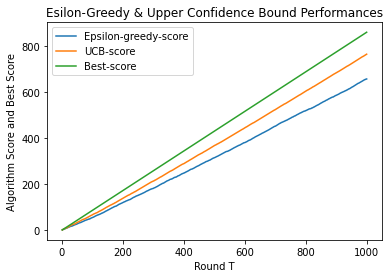

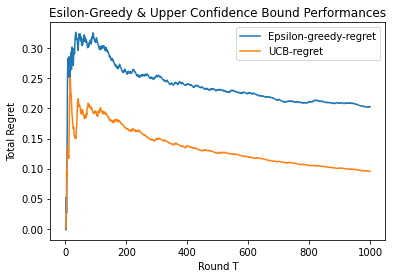

In [ ]:
'''
Course: Reinforcement Learning and Dynamic Optimization / PLH-423
Professor: Thrasyboylos Spyropoylos
Author: Ioannis Peridis - 2018030069
Date: 19/03/2023
Assignment 1:
This program, implements 2 different algorithms epsilon-Greedy and Upper Confidence Bound 
and plots their algorithm score (compared with the best score) and also the algorithm regret.
Everything takes place at stochastic arm bandit environment with k arms and T time steps(horizon)
'''
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import random

k = 10    # number of arms
T = 1000  # horizon  

# creating random bandit intervals [a,b] between values 0 and 1 for k arms
bandit_prob = np.random.rand(k,2)
bandit_prob.sort(axis = 1) 
print(f"Matrix With Random Bandit Intervals Between 0 and 1:\n {bandit_prob}")
bandit_true_means = np.zeros((k,))
print()
# printing each arm's true mean [(a+b)/2]
for i in range(k):
  bandit_true_means[i] = (bandit_prob[i, 0] + bandit_prob[i, 1])/2
  print(f"Arm: {i}, True Mean: {bandit_true_means[i]}")

# finding the best arm and its score (TRUE best)
best_arm_score = np.amax((bandit_prob[:, 0] + bandit_prob[:, 1])/2)
print(f"\nThe Best Arm Score = {best_arm_score}")
best_arm = np.argmax((bandit_prob[:, 0] + bandit_prob[:, 1])/2)
print(f"The Best Arm = {best_arm}\n")

# initializing all the vectors needed for the 2 algorithms to zero
best_score = np.zeros((T,)) # cumulative reward of best arm for round t
# e_greedy parameters
inst_score_e_greedy = np.zeros((T,))    # reward for round t
alg_score_e_greedy = np.zeros((T,))     # cumulative reward for round t
regret_e_greedy =  np.zeros((T,))       # regret for round t
pulls_e_greedy = np.zeros((k,))         # number of times that and arm is pulled
means_e_greedy = np.zeros((k,))         # arm sample  means   
total_rewards_e_greedy = np.zeros((k,)) # total cumulative reward
# same parameters for UCB
inst_score_UCB = np.zeros((T,))     
alg_score_UCB = np.zeros((T,))
regret_UCB =  np.zeros((T,)) 
pulls_UCB = np.zeros((k,))              
means_UCB = np.zeros((k,))  
total_rewards_UCB = np.zeros((k,))      
bandit_UCB = np.zeros((k,))          # arm UCB value


'''This is a function used for initialization of the arm pulls and means, it pulls each arm once
we are using at the start of the algorithm'''
def play_each_arm_once():
  for i in range(k):
    # e_greedy intialization
    means_e_greedy[i] = np.random.uniform(bandit_prob[i][0], bandit_prob[i][1])
    total_rewards_e_greedy[i] = means_e_greedy[i]
    pulls_e_greedy[i] += 1
    # UCB initialization
    means_UCB[i] = np.random.uniform(bandit_prob[i][0], bandit_prob[i][1])
    bandit_UCB[i] = means_UCB[i]
    total_rewards_UCB[i] = means_UCB[i]
    pulls_UCB[i] += 1
  return

'''This is a function that updates the number of pulls (adds 1) and the mean (adds the cumulative reward)
of the arm that we just pulled'''
def update_arm(arm, algorithm):
  # e_greedy update
  if algorithm == 1:
    total_rewards_e_greedy[arm] += means_e_greedy[arm]
    pulls_e_greedy[arm] += 1
  # UCB update
  elif algorithm == 2:
    total_rewards_UCB[arm] += means_UCB[arm] 
    pulls_UCB[arm] += 1
  return

'''epsilon-Greedy Algorithm implementation (takes as input the number of time steps and returns the instance arm score)'''
def epsilon_greedy(t):
  #set the epsilon parameter
  epsilon = t ** (-1 / 3) * ((k * np.log(t)) ** (1 / 3)) 
  for arm in range(k):
    # calculate the sample cumulative mean
    means_e_greedy[arm] = np.random.uniform(bandit_prob[arm][0], bandit_prob[arm][1])
  if random.random() < epsilon:
    # choose random arm with probability epsilon
    random_arm = np.random.randint(k)
    inst_score = np.random.uniform(bandit_prob[random_arm][0], bandit_prob[random_arm][1])
    # update the arm you pulled
    update_arm(random_arm, 1)
  else:
    # else choose the arm with the best score with probability 1-epsilon
    best_e_greedy_arm = np.argmax(total_rewards_e_greedy/pulls_e_greedy)
    inst_score = np.random.uniform(bandit_prob[best_e_greedy_arm][0], bandit_prob[best_e_greedy_arm][1])
    # update the arm you pulled
    update_arm(best_e_greedy_arm, 1)
  return inst_score

'''Upper Confidence Bound Algorithm implementation  (takes as input the number of time steps and returns the instance arm score)'''
def UCB(t):
  for arm in range(k):
    # calculate the sample cumulative mean
    means_UCB[arm] = np.random.uniform(bandit_prob[arm][0], bandit_prob[arm][1])
    # calculate the UCB value
    bandit_UCB[arm] = total_rewards_UCB[arm]/pulls_UCB[arm] + np.sqrt(np.log(t)/pulls_UCB[arm])
  # find the best UCB arm and its value
  best_UCB = np.amax(bandit_UCB)
  best_arm_UCB = np.argmax(bandit_UCB)
  # choose the arm with the best UCB score
  inst_score = np.random.uniform(bandit_prob[best_arm_UCB][0], bandit_prob[best_arm_UCB][1])
  # update the arm you pulled
  update_arm(best_arm_UCB, 2)
  return inst_score

def main():
  # we are pulling each arm once and we initialize the pulls and the means
  play_each_arm_once()
  # we are looping for the hall horizon
  for i in range(1, T):
    # instance scores for epsilon-Greedy and UCB algorithms
    inst_score_e_greedy[i] = epsilon_greedy(i)
    inst_score_UCB[i] = UCB(i)
    if i > 0 :
      # cumulative best score
      best_score[i] = best_score[i-1] + best_arm_score
      # cumulative algorithm scores for the 2 algortihms
      alg_score_e_greedy[i] = alg_score_e_greedy[i-1] + inst_score_e_greedy[i]
      alg_score_UCB[i] = alg_score_UCB[i-1] + inst_score_UCB[i]
    else :
      # this is executed only for the first iteration
      best_score[i] = best_arm_score
      alg_score_e_greedy[i] = inst_score_e_greedy[i]
      alg_score_UCB[i] = inst_score_UCB[i]
    # regret for the 2 algorithms
    regret_e_greedy[i] = (best_score[i] - alg_score_e_greedy[i])/(i+1)
    regret_UCB[i] = (best_score[i] - alg_score_UCB[i])/(i+1)

  # pritning the total number of pulls of each arm in the 2 algorithms
  print(f"epsilon-Greedy total  pulls :{pulls_e_greedy}") 
  print(f"UCB total  pulls            :{pulls_UCB}\n")
  # here we plot the best score and the scores of the 2 algorithms so we can compare them
  plt.title("Esilon-Greedy & Upper Confidence Bound Performances") 
  plt.xlabel("Round T") 
  plt.ylabel("Algorithm Score and Best Score") 
  plt.plot(np.arange(1, T + 1), alg_score_e_greedy, label = 'Epsilon-greedy-score')
  plt.plot(np.arange(1, T + 1), alg_score_UCB, label = 'UCB-score')
  plt.plot(np.arange(1, T + 1), best_score, label = 'Best-score')
  plt.legend() 
  plt.show()
  print()
  # here we plot the regret of the 2 algorithms so we can compare them 
  plt.title("Esilon-Greedy & Upper Confidence Bound Performances") 
  plt.xlabel("Round T") 
  plt.ylabel("Total Regret") 
  plt.plot(np.arange(1, T + 1), regret_e_greedy, label = 'Epsilon-greedy-regret')
  plt.plot(np.arange(1, T + 1), regret_UCB, label = "UCB-regret") 
  plt.legend() 
  plt.show()

if __name__ == '__main__':
  main()